### Récupération du dataset

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('Mall_Customers.xls',index_col='CustomerID')

display(df)
df.info()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


### Gestion des doublons et des valeurs manquantes

In [3]:
# Vérifier l'absence de doublons
print(df.duplicated().sum())

# Vérifier l'absence de valeurs nulles
print(df.isna().sum())

0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### Vérification de la validité des données

Gender
Female    112
Male       88
Name: count, dtype: int64


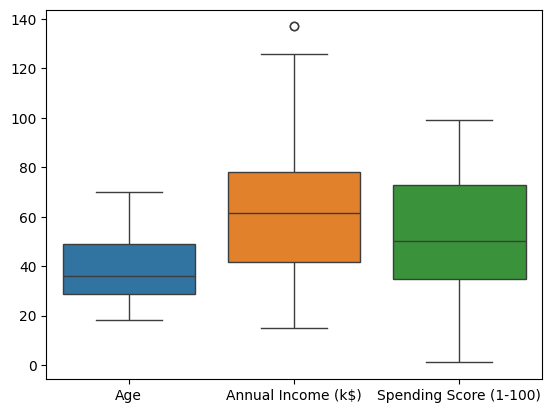

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vérifier la distribution des données qualitatives
print (df['Gender'].value_counts())

# Vérifier la distribution des données quantitatives
sns.boxplot(df.drop(['Gender'], axis=1))
plt.show()
# Les données semblent cohérentes

### Analyse des relations entre les données

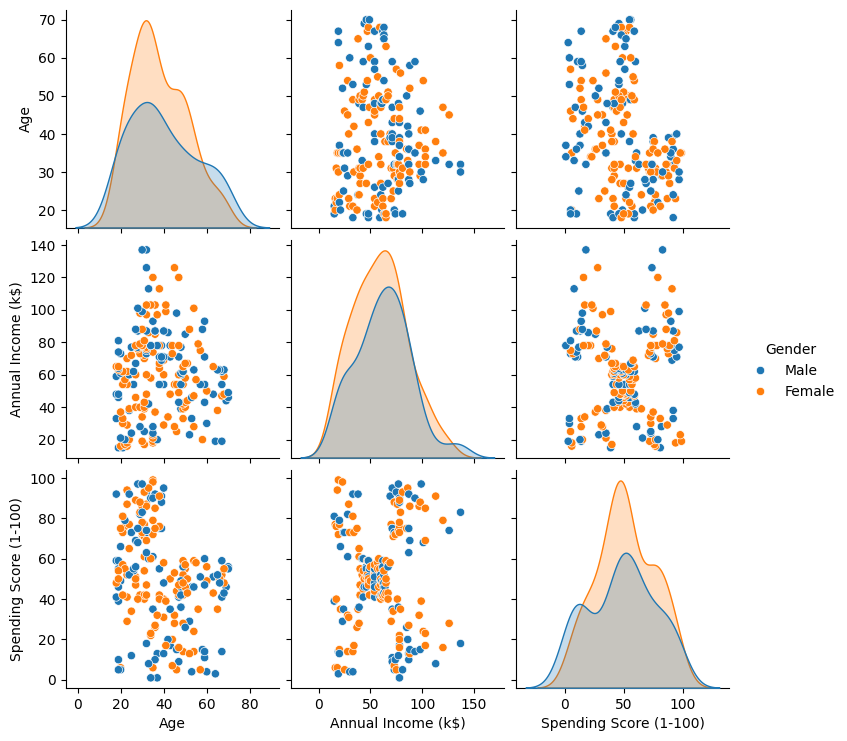

In [ ]:
# On trace un pairplot des variables numériques en catégorisant suivant le genre
sns.pairplot(df,hue='Gender')

# Annual Income et Spending Score semblent bien se prêter à la clusterisation

### Graphique des distorsions

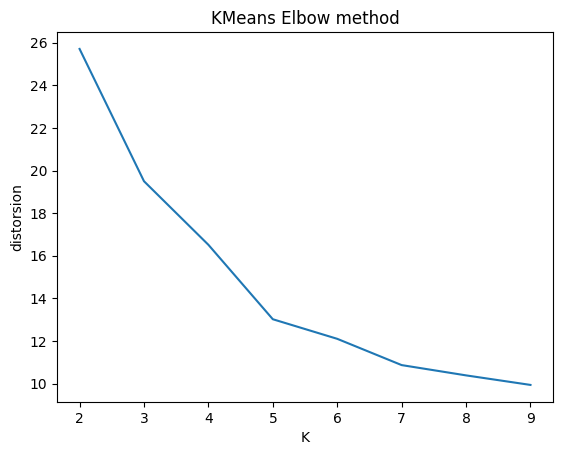

In [11]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

df_kmeans = df[['Annual Income (k$)','Spending Score (1-100)']]
distorsions = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_kmeans)
    dist_obs_centre = np.min(cdist(df_kmeans,kmeans.cluster_centers_),axis=1)
    distorsions.append(dist_obs_centre.mean())

plt.plot(np.arange(2,10),distorsions)
plt.xlabel("K")
plt.ylabel("distorsion")
plt.title("KMeans Elbow method")
plt.show()

### Entraînement du modèle KMeans

In [24]:
# on va utiliser 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_kmeans)

# Calcul des centroïds et des labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print (labels)

[[55.0875     49.7125    ]
 [86.53846154 82.12820513]
 [87.75       17.58333333]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


### Visualisation des clusters et centroïdes

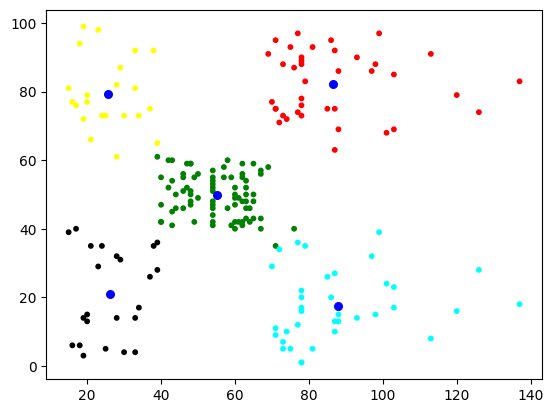

In [25]:
#Visualisation des clusters et des centroïdes 

# Liste des couleurs
colors = ["green","red","cyan","yellow","black","orange","brown"]

plt.scatter(df_kmeans['Annual Income (k$)'], df_kmeans['Spending Score (1-100)'], s=10, c=[colors[label] for label in labels])

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()